# **CO2 Emissions by Country:**
## Will we hit our Paris Climate Agreement Goals?
###### Time Series Analysis by Ben Geissel

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
plt.style.use('ggplot')
import modules
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Import Emissions Data
Data is originally from the Carbon Dioxide Information Center and was downloaded from: https://datahub.io/core/co2-fossil-by-nation#python

In [2]:
# Import and clean data
emissions_df = modules.load_and_clean_emissions('Data_Files/fossil-fuel-co2-emissions-by-nation_csv.csv')

### Country Selection for Time Series Analysis

In [3]:
# User selection of countries to be used in analysis. For example, I've chosen one country from each continent.
# Possible country names can be found by uncommenting line below and running
# print(emissions_df.Country.unique())
modules.country_picks = ['UNITED STATES OF AMERICA', 'SPAIN', 'AUSTRALIA', 'SOUTH AFRICA', 'CHINA (MAINLAND)', 'BRAZIL']

### Data Filtering and Formating

In [4]:
# Filter dataframe based on selected countries. Return as a dictionary with dataframe name keys and dataframe values
country_df_dict = modules.create_country_df_dict(emissions_df)

In [5]:
# Format each country dataframe into the proper time series format
country_df_dict = modules.format_time_series(country_df_dict)

### Initial Time Series Visualizations

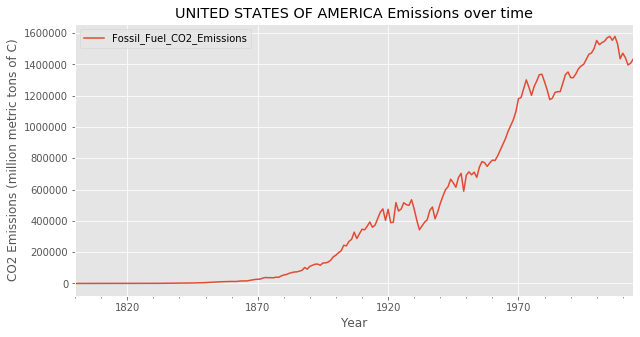

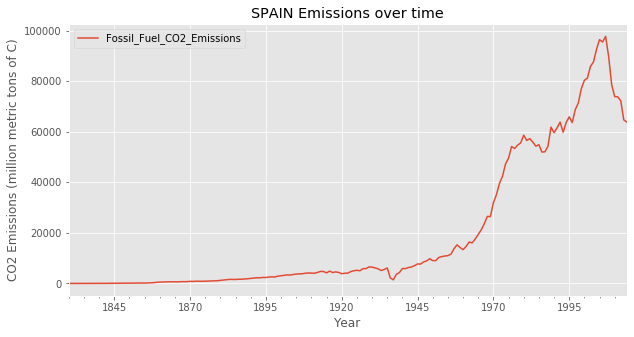

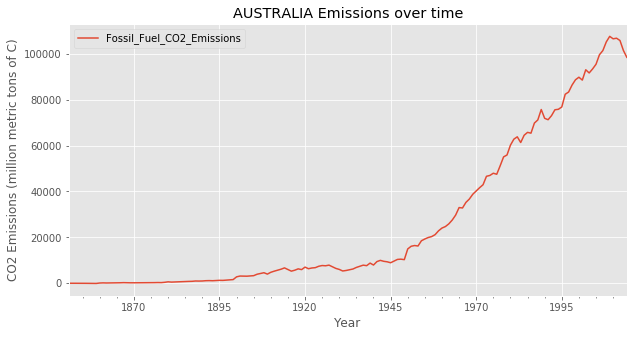

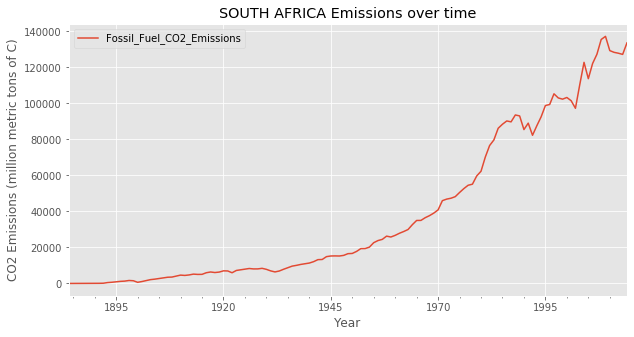

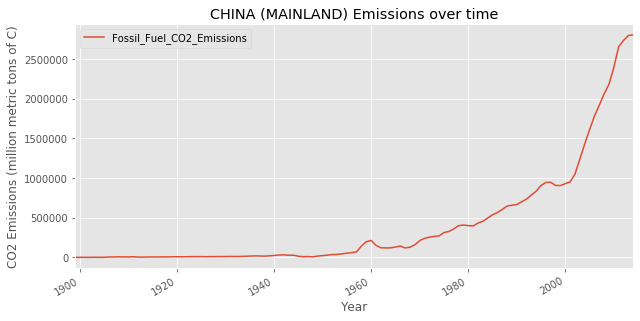

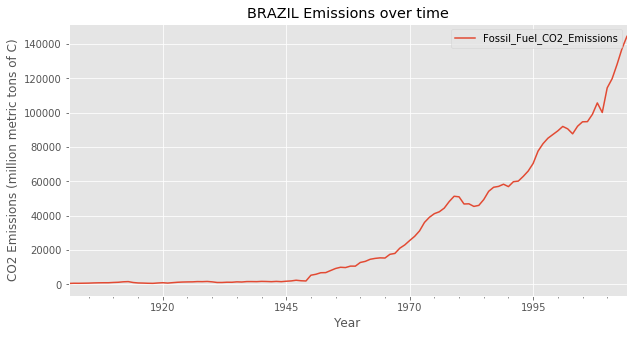

In [6]:
# Plot individual country time series for initial viewing
modules.plot_country_time_series(country_df_dict)

### Time Period Selection
Since the code will work for any selection of countries, the user needs to select based on initial visualizations how many years to keep in the model. For the example, I have selected 1902 as the starting year, as all selected countries have data as far back as 1902 and it keeps quite a bit of data points for training the model.

In [7]:
# Select starting year
modules.starting_year = 1902

In [8]:
# Drop unnecessary years from the time series
country_df_dict = modules.drop_years(country_df_dict)

### All Selected Countries Visualization

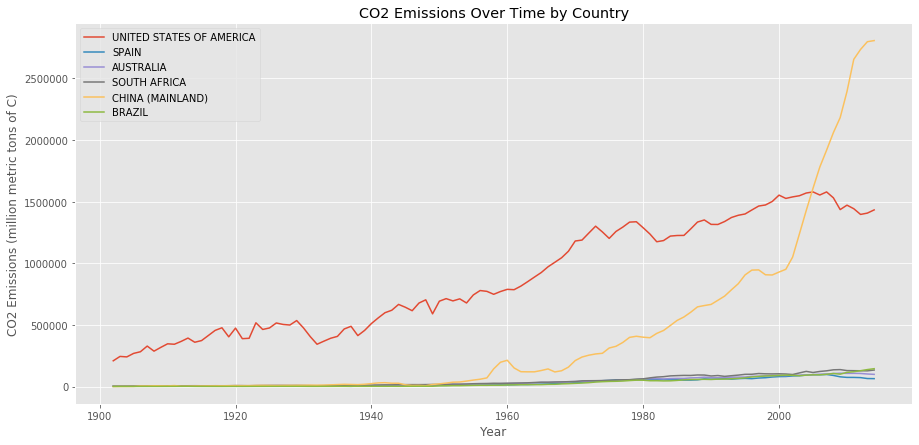

In [9]:
# Visualize all selected countries together in a single time series plot
modules.plot_all_countries_time_series(country_df_dict)

### Decomposition of Time Series
Note the lack of seasonality in these time series decompositions. These time series are completely made of trend.

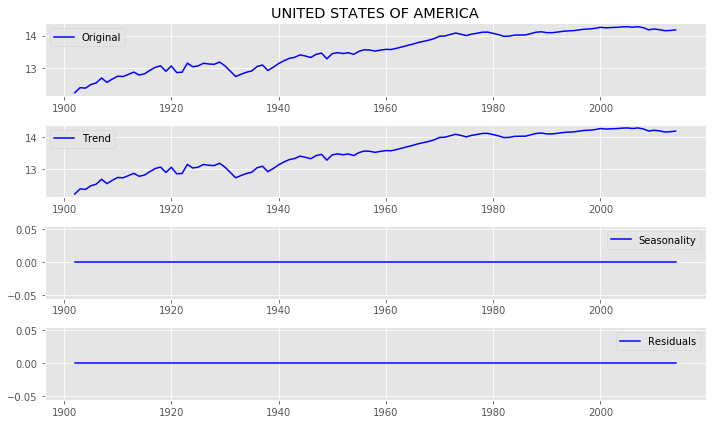

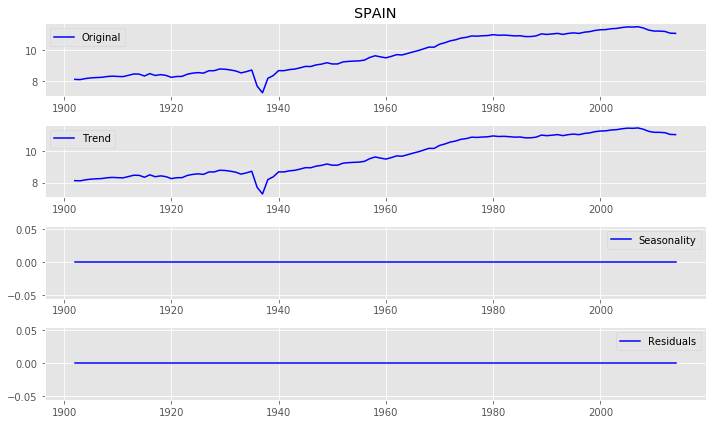

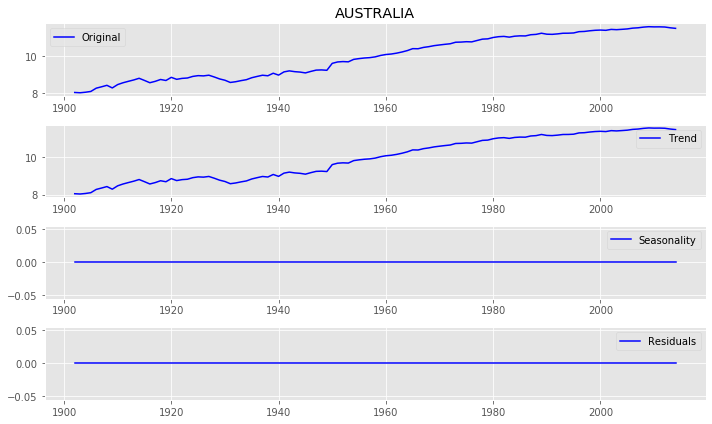

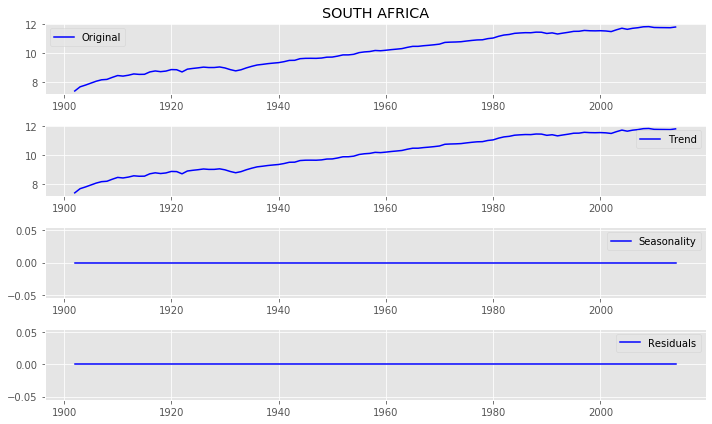

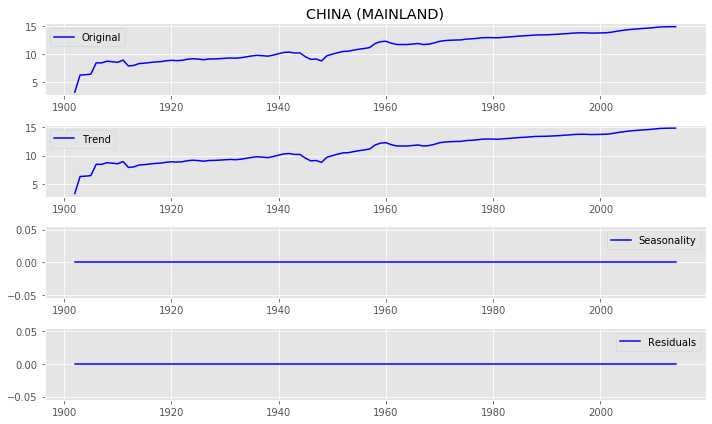

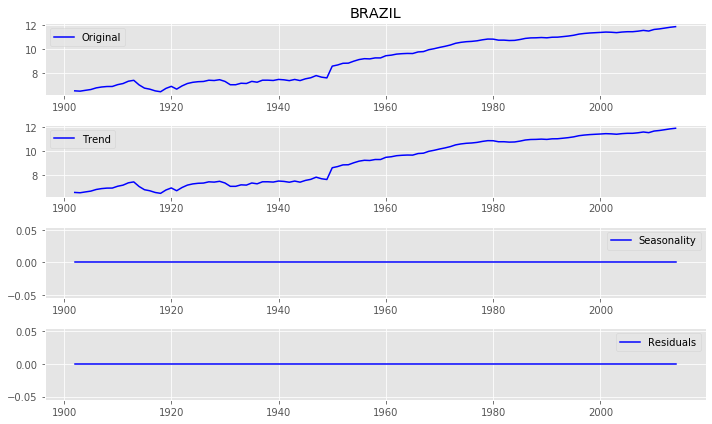

In [10]:
# Decompose each country's time series
modules.decomposition(country_df_dict)

### Stationarity Checks
In most cases 2nd order differencing will create a stationary time series for a country in the dataset. 2nd Order Differencing is accomplished below.

In [11]:
# First Order Differencing
diff_country_df_dict = modules.differencing(country_df_dict)

In [12]:
# Second Order Differencing
diff2_country_df_dict = modules.differencing(diff_country_df_dict)

In [13]:
# Check for Stationarity with Dickey-Fuller Tests
modules.Dickey_Fuller_Test(diff2_country_df_dict)

100.0% pass Dickey-Fuller Test


{'UNITED STATES OF AMERICA_df': 7.82041230964063e-12,
 'SPAIN_df': 4.2253241088536187e-23,
 'AUSTRALIA_df': 3.921382949841658e-09,
 'SOUTH AFRICA_df': 0.00014663032960343103,
 'CHINA (MAINLAND)_df': 2.4816636271367432e-05,
 'BRAZIL_df': 7.766630283148366e-10}

### Autocorrelation Checks
Determine Autoregressive (AR) and Moving Average (MA) terms from the partial autocorrelation and autocorrelation plots respectively.

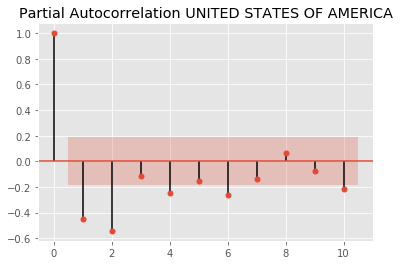

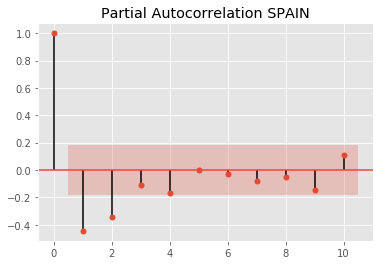

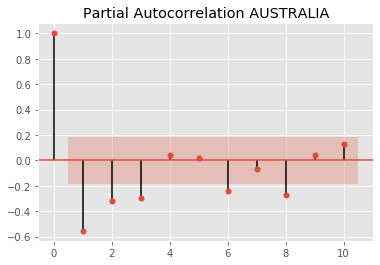

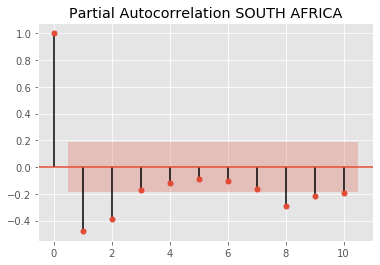

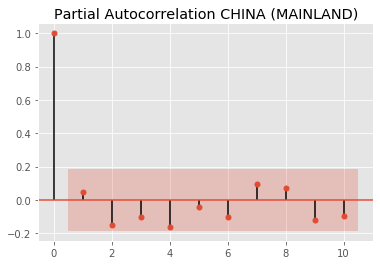

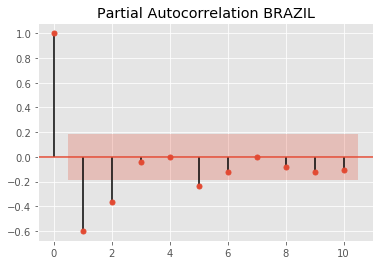

In [14]:
# Partial autocorrelation plots. Determine AR terms.
modules.plot_partial_autocorrelation(diff2_country_df_dict)

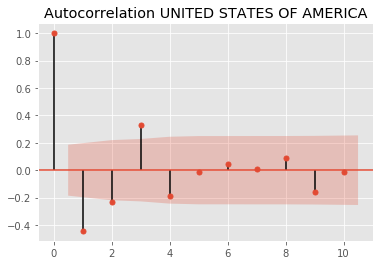

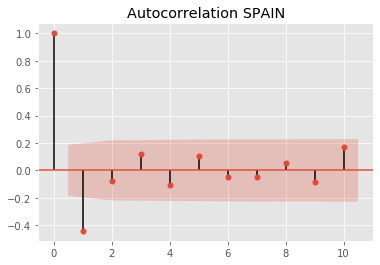

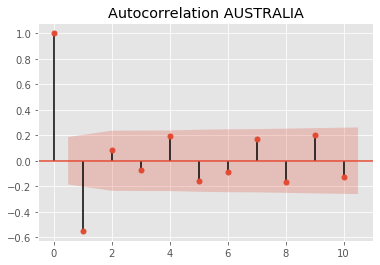

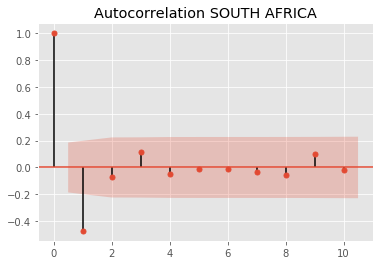

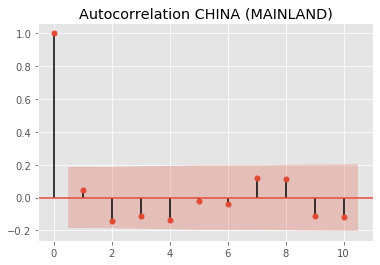

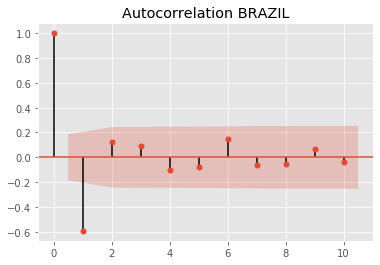

In [15]:
# Autocorrelation plots. Determine MA terms.
modules.plot_autocorrelation(diff2_country_df_dict)

### Fitting an ARIMA Model

The following code determines the p, d, q parameters of the ARIMA model to use for each country. These parameters are based on the autocorrelation plots. (If analyzing different countries, the country names and p,d,q variables will need to be adjusted below).

In [16]:
# Create optimal parameters dictionary to be used in ARIMA model (based on ACF and PACF results) -> (p,d,q)
# p comes from partial autocorrelation
# d comes from order of differencing
# q comes from autocorrelation

optimal_params = {}
for key in diff2_country_df_dict.keys():
    optimal_params[key] = ()

optimal_params['UNITED STATES OF AMERICA_df'] = (2, 2, 1)
optimal_params['SPAIN_df'] = (2, 2, 1)
optimal_params['AUSTRALIA_df'] = (3, 2, 1)
optimal_params['SOUTH AFRICA_df'] = (2, 2, 1)
optimal_params['CHINA (MAINLAND)_df'] = (0, 2, 0)
optimal_params['BRAZIL_df'] = (2, 2, 1)

### ARIMA Model Results and Diagnostics

UNITED STATES OF AMERICA Summary                                Statespace Model Results                              
Dep. Variable:     Fossil_Fuel_CO2_Emissions   No. Observations:                  113
Model:                      SARIMAX(2, 2, 1)   Log Likelihood               -1320.614
Date:                       Wed, 08 Jan 2020   AIC                           2651.228
Time:                               12:45:55   BIC                           2664.685
Sample:                           01-01-1902   HQIC                          2656.685
                                - 01-01-2014                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -6.2719     30.341     -0.207      0.836     -65.739      53.196
ar.L1         -0.2477      0.123     -2.01

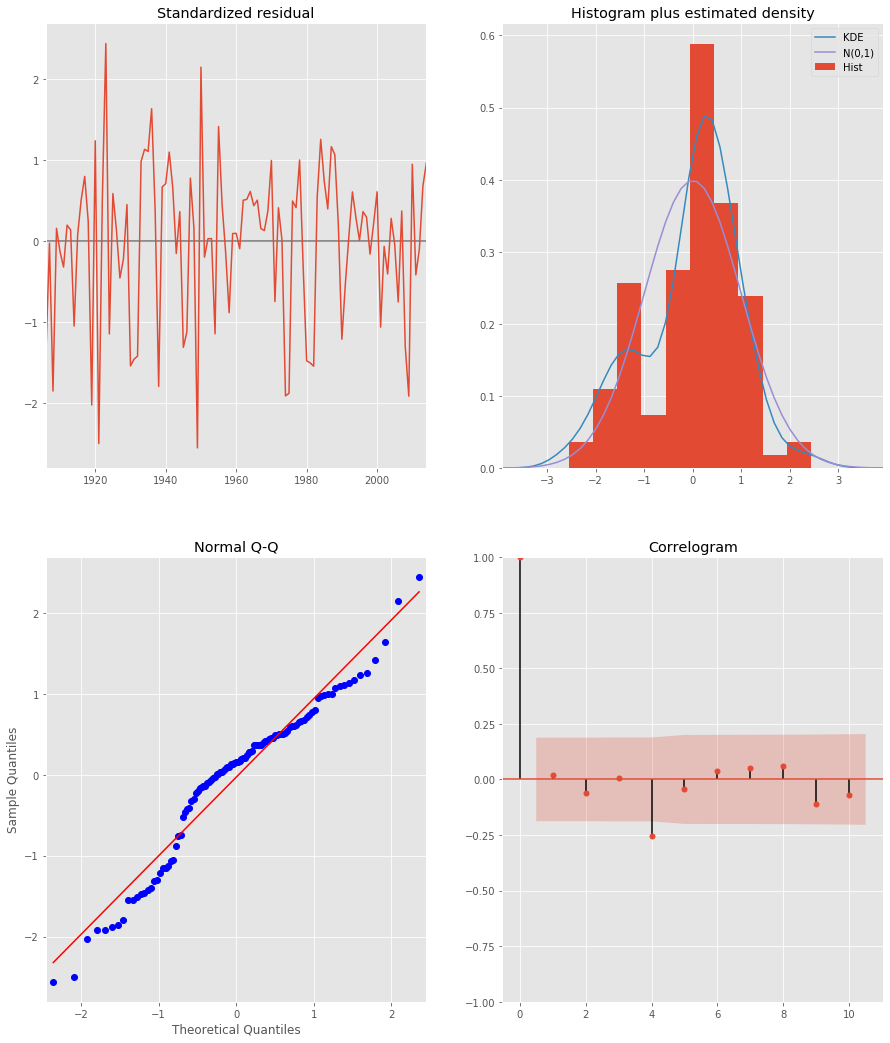



SPAIN Summary                                Statespace Model Results                              
Dep. Variable:     Fossil_Fuel_CO2_Emissions   No. Observations:                  113
Model:                      SARIMAX(2, 2, 1)   Log Likelihood               -1003.079
Date:                       Wed, 08 Jan 2020   AIC                           2016.158
Time:                               12:45:56   BIC                           2029.615
Sample:                           01-01-1902   HQIC                          2021.615
                                - 01-01-2014                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0696      0.223     -0.312      0.755      -0.507       0.368
ar.L1          0.2905      0.078      3.723      0.000     

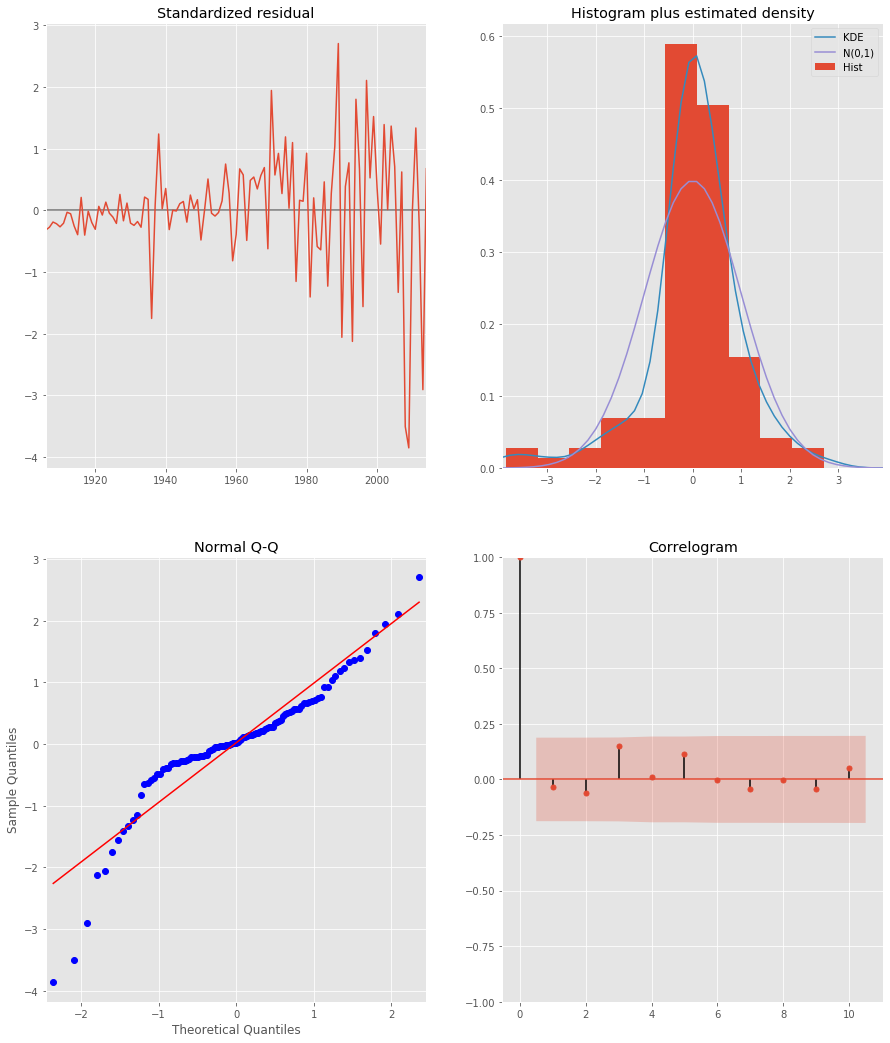



AUSTRALIA Summary                                Statespace Model Results                              
Dep. Variable:     Fossil_Fuel_CO2_Emissions   No. Observations:                  113
Model:                      SARIMAX(3, 2, 1)   Log Likelihood                -954.203
Date:                       Wed, 08 Jan 2020   AIC                           1920.406
Time:                               12:45:57   BIC                           1936.499
Sample:                           01-01-1902   HQIC                          1926.931
                                - 01-01-2014                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -2.3986      2.230     -1.076      0.282      -6.769       1.972
ar.L1         -0.9059      0.292     -3.101      0.002 

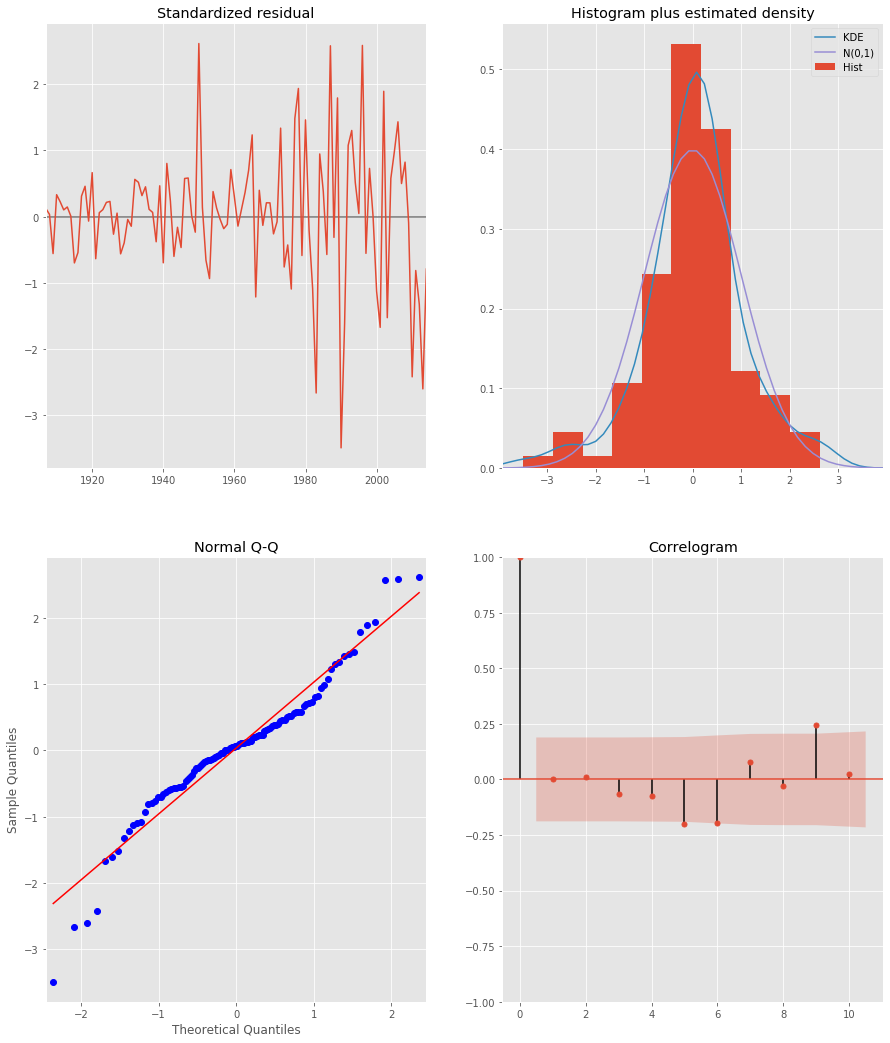



SOUTH AFRICA Summary                                Statespace Model Results                              
Dep. Variable:     Fossil_Fuel_CO2_Emissions   No. Observations:                  113
Model:                      SARIMAX(2, 2, 1)   Log Likelihood               -1033.861
Date:                       Wed, 08 Jan 2020   AIC                           2077.723
Time:                               12:45:58   BIC                           2091.180
Sample:                           01-01-1902   HQIC                          2083.180
                                - 01-01-2014                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.3513      0.148      2.370      0.018       0.061       0.642
ar.L1         -0.0100      0.065     -0.154      0.8

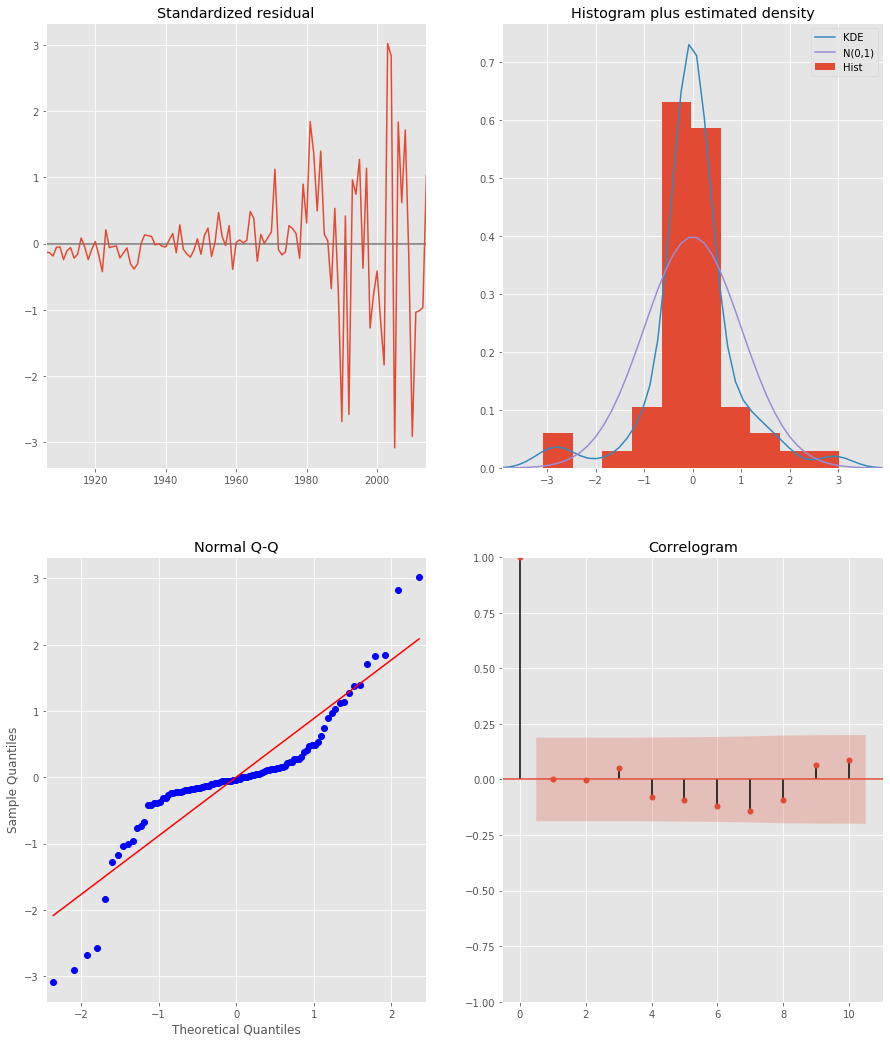



CHINA (MAINLAND) Summary                                Statespace Model Results                              
Dep. Variable:     Fossil_Fuel_CO2_Emissions   No. Observations:                  113
Model:                      SARIMAX(0, 2, 0)   Log Likelihood               -1288.313
Date:                       Wed, 08 Jan 2020   AIC                           2580.626
Time:                               12:45:58   BIC                           2586.027
Sample:                           01-01-1902   HQIC                          2582.816
                                - 01-01-2014                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -3.8320     32.281     -0.119      0.906     -67.101      59.437
sigma2      8.638e+08   4.77e+07     18.116     

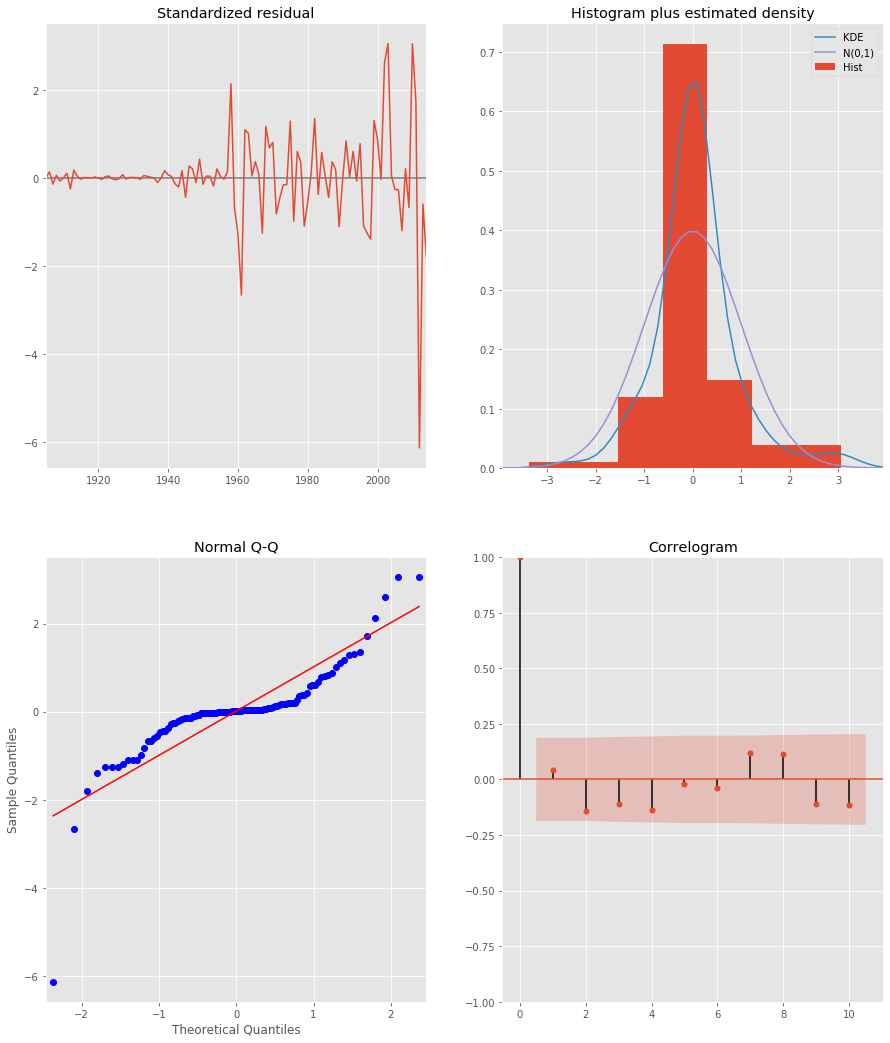



BRAZIL Summary                                Statespace Model Results                              
Dep. Variable:     Fossil_Fuel_CO2_Emissions   No. Observations:                  113
Model:                      SARIMAX(2, 2, 1)   Log Likelihood                -993.285
Date:                       Wed, 08 Jan 2020   AIC                           1996.571
Time:                               12:45:59   BIC                           2010.028
Sample:                           01-01-1902   HQIC                          2002.028
                                - 01-01-2014                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          3.2219      2.288      1.408      0.159      -1.262       7.705
ar.L1         -0.6871      0.293     -2.343      0.019    

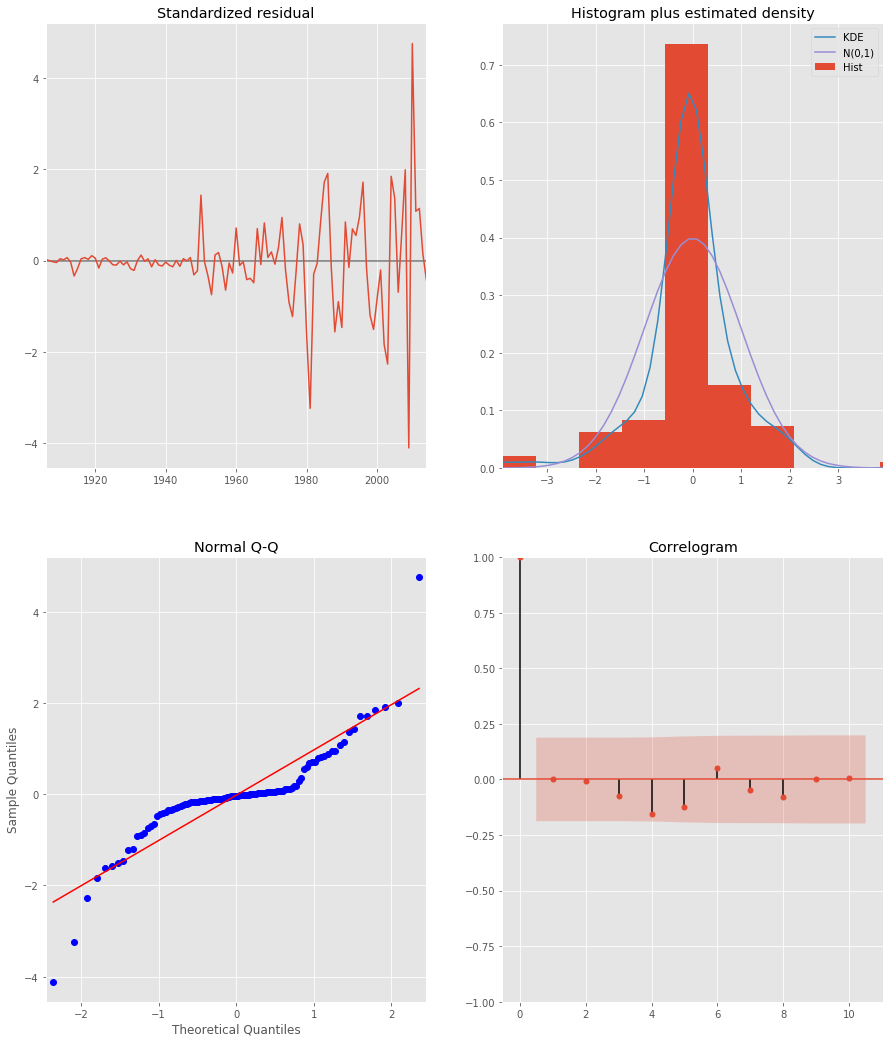

In [17]:
# Run ARIMA model and view diagnostics
results_dict = {}
for key in country_df_dict.keys():
    ts = country_df_dict[key]
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts, order = optimal_params[key],
                                            enforce_stationarity=False, enforce_invertibility=False, trend = 't')
    results = ARIMA_MODEL.fit()
    results_dict[key] = results
    print(f'{key[:-3]} Summary {results.summary()}')
    print()
    results.plot_diagnostics(figsize=(15, 18))
    plt.show()
    print()
    print()

### Model Validation

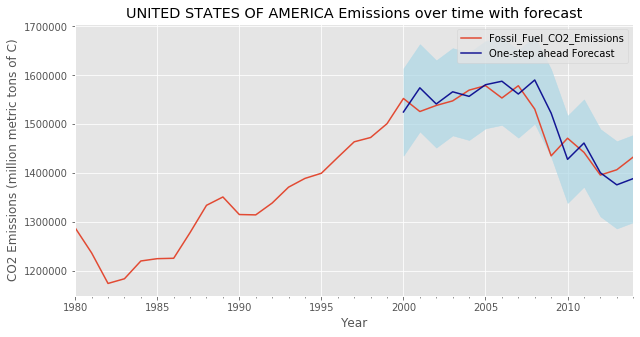

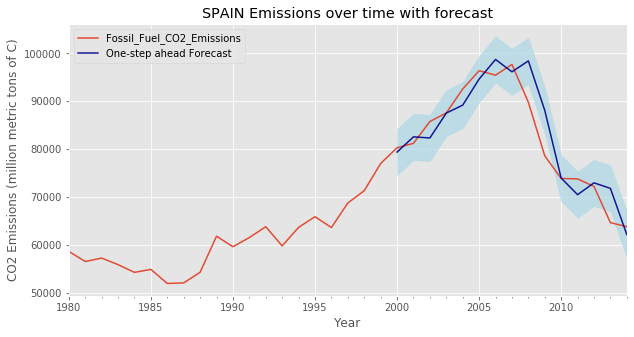

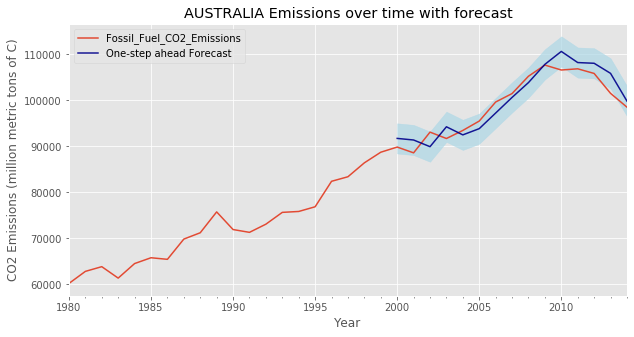

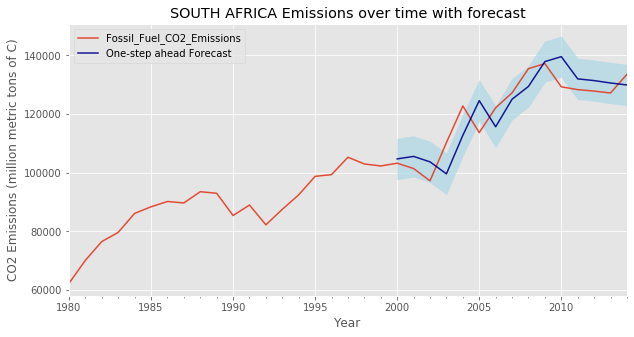

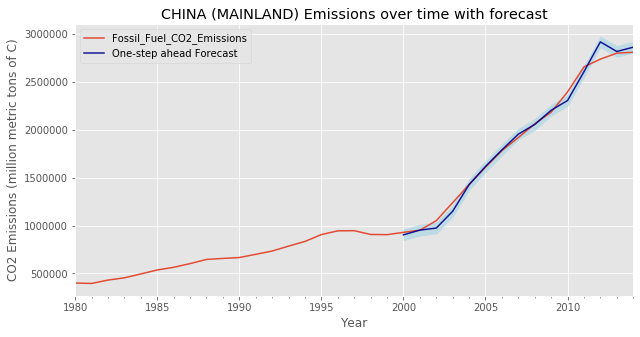

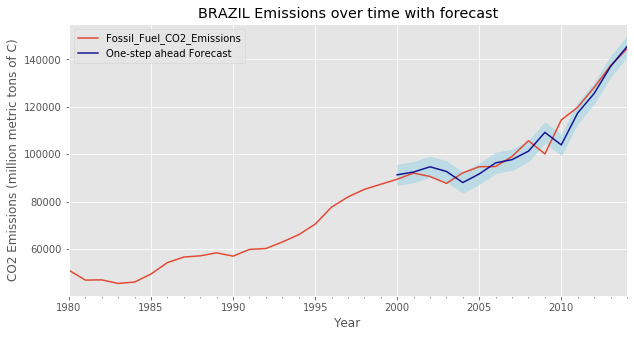

In [18]:
# Get predictions starting from 2000 and calculate confidence intervals.
# Compare predictions to actual data 2000-2014
for key in results_dict.keys():
    results = results_dict[key]
    predictions = results.get_prediction(start=pd.to_datetime('2000-01-01'), dynamic=False)
    pred_conf = predictions.conf_int()
    
    #Plot observed values
    ax = country_df_dict[key]['1980':].plot(label='observed', figsize = (10,5))

    #Plot predicted values
    predictions.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9, color = 'darkblue')

    #Plot the range for confidence intervals
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='lightblue', alpha=.7)

    #Set axes labels
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 Emissions (million metric tons of C)')
    plt.legend()
    plt.title(f'{key[:-3]} Emissions over time with forecast')
    plt.show()

The models appear to be working well as they follow the validation data fairly closely. Now we can move on to predictions and comparisons to the Paris Climate Agreement Goals.
______

### Paris Climate Agreement Goals (40% cut from 1990 emissions by 2030)

In [19]:
# Calculate Paris Climate Agreement Goals
paris_levels = modules.calc_paris_goals(country_df_dict)

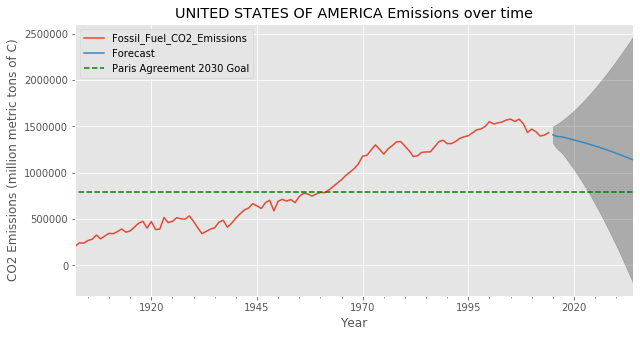

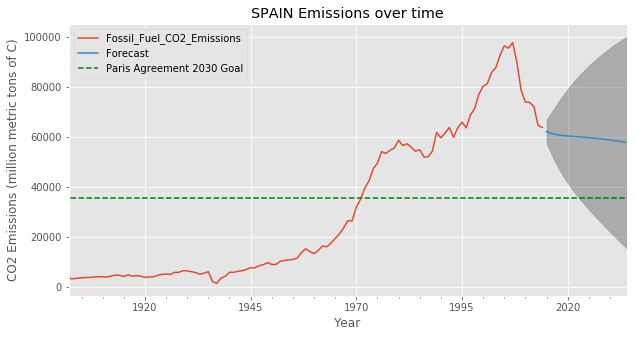

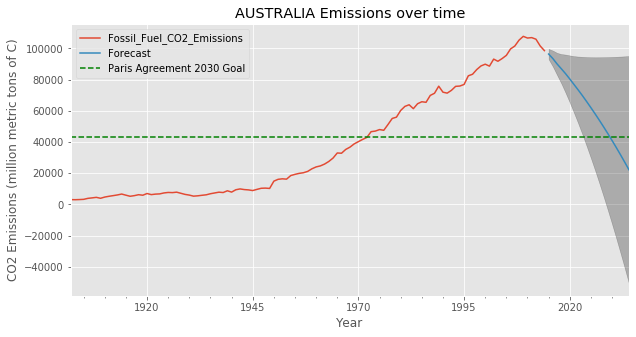

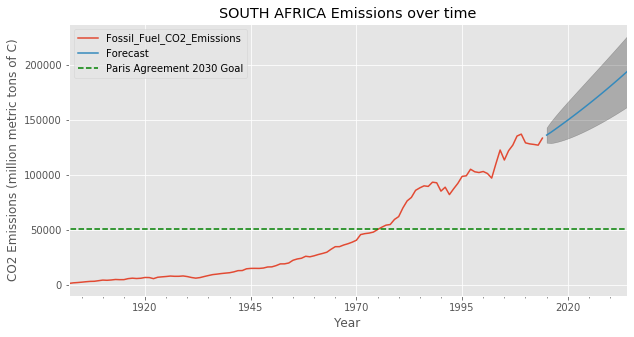

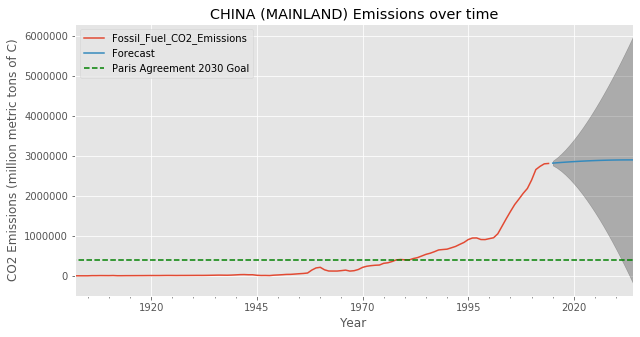

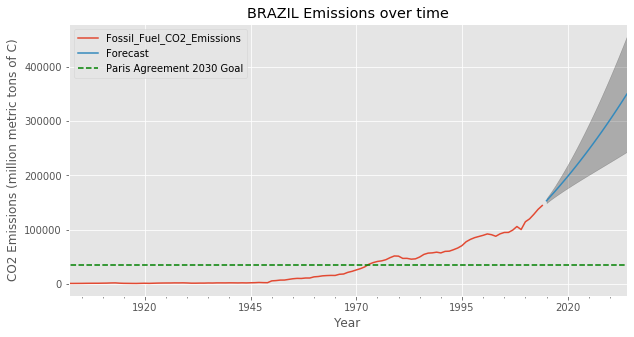

In [20]:
# Emissions forecasts with Paris Agreement Goals threshold
for key in results_dict.keys():
    results = results_dict[key]
    prediction = results.get_forecast(steps=20, dynamic = True)
    pred_conf = prediction.conf_int()
    
    ax = country_df_dict[key].plot(label='observed', figsize=(10,5))
    prediction.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='k', alpha=.25)
    ax.axhline(y = paris_levels[key], xmin = pd.to_datetime(1902, format = '%Y'),
               xmax = pd.to_datetime(2034, format = '%Y'), linestyle = '--', color = 'g', label = 'Paris Agreement 2030 Goal')
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 Emissions (million metric tons of C)')
    plt.title(f'{key[:-3]} Emissions over time')
    plt.legend(loc = 'upper left')
    plt.show()

### Conclusions
You can see that many countries will need to take drastic measures to reverse their current climate emissions trends in order to meet the goals of the Paris Climate Agreement.